<a href="https://colab.research.google.com/github/RicardoLelis/ML-DS-Code/blob/main/logistic_regression_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0 0.6931471
1 0.6108104
2 0.60443664
3 0.5997917
4 0.5952662
5 0.5908472
6 0.5865305
7 0.5823122
8 0.5781885
9 0.57415575
10 0.57021034
11 0.56634897
12 0.56256837
13 0.5588655
14 0.5552373
15 0.55168104
16 0.54819405
17 0.5447736
18 0.54141724
19 0.5381228
20 0.5348879
21 0.5317103
22 0.5285881
23 0.5255194
24 0.52250195
25 0.5195343
26 0.5166147
27 0.51374143
28 0.510913
29 0.50812787
30 0.5053847
31 0.50268203
32 0.50001866
33 0.49739328
34 0.4948048
35 0.49225196
36 0.4897338
37 0.48724923
38 0.4847973
39 0.48237702
40 0.47998756
41 0.47762793
42 0.47529742
43 0.47299522
44 0.47072056
45 0.4684727
46 0.46625093
47 0.46405455
48 0.46188307
49 0.45973572
50 0.45761195
51 0.45551127
52 0.45343304
53 0.45137677
54 0.449342
55 0.44732815
56 0.4453349
57 0.44336167
58 0.44140807
59 0.43947375
60 0.43755823
61 0.4356612
62 0.43378222
63 0.43192095
64 0.43007708
65 0.42825025
66 0.42644018
67 0.4246465
68 0.4228689
69 0.42110717
70 0.41936097
71 0.41763008
72 0.41591418
73 0.41421306
74 0.

<function matplotlib.pyplot.show>

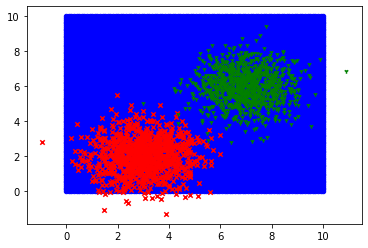

In [1]:
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import matplotlib.pyplot as plt

learning_rate = 0.1
training_epochs = 2000

def sigmoid(x):
  return 1. / (1. + np.exp(-x))

# input/output placeholder nodes
x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)

x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)

ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

X1 = tf.compat.v1.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.compat.v1.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.compat.v1.placeholder(tf.float32, shape=(None,), name="y")

# parameter node
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

# sigmoid model using both input variables
y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])

# Learning step definition
cost = tf.reduce_mean(-tf.compat.v1.log(y_model * Y + (1 - y_model) * (1 - Y)))
train_op = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Create a new session, initializes variables, and learns parameters until convergence
with tf.compat.v1.Session() as sess:
  sess.run(tf.compat.v1.global_variables_initializer())
  prev_err = 0
  for epoch in range(training_epochs):
    err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
    print(epoch, err)
    if abs(prev_err - err) < 0.0001:
      break
    prev_err = err
  
  # Obtains the learned parameter value before closing the session
  w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})

# Defines arrays to hold boundary points
x1_boundary, x2_boundary = [], []

# Loops through a window of points
for x1_test in np.linspace(0, 10, 100):
  for x2_test in np.linspace(0, 10, 100):
    z = sigmoid(-x2_test * w_val[2] - x1_test * w_val[1] - w_val[0])
    
    # If the model response is close the 0.5, updates the boundary points
    if abs(z < - 0.5) < 0.01:
      x1_boundary.append(x1_test)
      x2_boundary.append(x2_test)

# Shows the boundary line along with the data
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)

plt.show



## Softmax regression

### Visualizing multiclass data

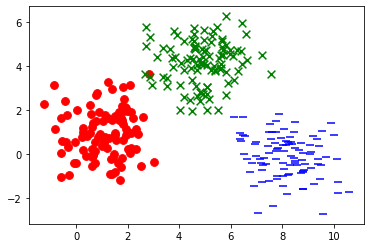

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)

plt.show()

### Setting up training and test data for multiclass classification

In [3]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))

xs = np.vstack((xs_label0, xs_label1, xs_label2))

labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] \
                   * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))


arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))

test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

train_size, num_features = xs.shape

### Using softmax regression

In [4]:
import tensorflow as tf

learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

X = tf.compat.v1.placeholder("float", shape=[None, num_features])
Y = tf.compat.v1.placeholder("float", shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))

y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.compat.v1.log(y_model))
train_op = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correction_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correction_prediction, "float"))


### Execute the graph
- with batch learning.

In [5]:
with tf.compat.v1.Session() as sess:
  tf.compat.v1.global_variables_initializer().run()

  for step in range(training_epochs * train_size // batch_size):
    offset = (step * batch_size) % train_size
    batch_xs = xs[offset: (offset + batch_size), :]
    batch_labels = labels[offset: (offset + batch_size)]
    err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y:
                                                   batch_labels})
    print(step, err)
  
  W_val = sess.run(W)
  print('w', W_val)
  b_val = sess.run(b)
  print('b', b_val)
  print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))

0 109.86123
1 186.74428
2 347.62756
3 490.65228
4 79.62919
5 49.094482
6 42.027027
7 43.85325
8 41.356236
9 34.144073
10 67.803635
11 29.044447
12 23.001509
13 39.130154
14 21.056702
15 16.104362
16 22.15685
17 18.38839
18 15.124691
19 20.151575
20 16.430874
21 13.647941
22 17.953815
23 15.3267355
24 12.4052515
25 16.35602
26 13.446687
27 11.090872
28 14.711162
29 12.490057
30 10.275939
31 13.597608
32 11.449965
33 9.541794
34 12.700617
35 10.740676
36 8.969044
37 11.967805
38 10.082934
39 8.470252
40 11.349732
41 9.53155
42 8.041212
43 10.82201
44 9.046741
45 7.668695
46 10.367712
47 8.621948
48 7.342923
49 9.973356
50 8.246583
51 7.0561776
52 9.628403
53 7.9129696
54 6.802122
55 9.324455
56 7.614707
57 6.575621
58 9.05479
59 7.3465505
60 6.372461
61 8.813977
62 7.104164
63 6.189177
64 8.597617
65 6.8839498
66 6.022907
67 8.402112
68 6.6829095
69 5.8712683
70 8.224502
71 6.498523
72 5.732278
73 8.062339
74 6.3286757
75 5.604274
76 7.913587
77 6.171577
78 5.485858
79 7.7765408
80 6.025